<a href="https://colab.research.google.com/github/SaiDhanyaa/ExcelR_Assignments/blob/main/ASSIGNMENT_18b_FORECASTING_Airlines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Forecast the Airlines passengers on the given data set. Prepare a document for each model explaining how many dummy variables you have created and RMSE value for each model. Finally which model you will use for Forecasting.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
airlines = pd.read_excel('/content/Airlines+Data.xlsx')
airlines.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


# **EDA**

In [ ]:
airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [ ]:
airlines.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


**Visualizations**

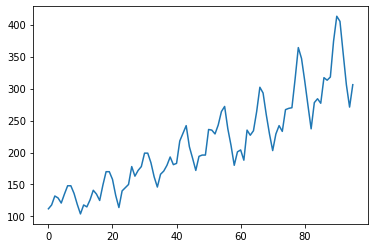

In [ ]:
airlines.Passengers.plot()
plt.show()

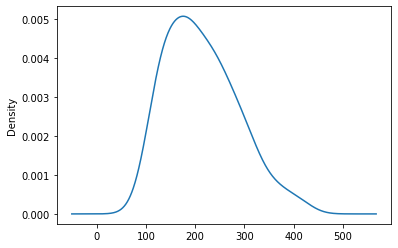

In [ ]:
#Kernel Density plot
airlines.Passengers.plot(kind='kde')
plt.show()

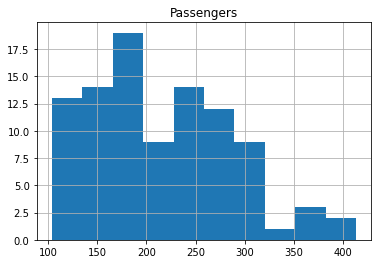

In [ ]:
# Histogram
airlines.hist()
plt.show()

In [ ]:
airlines.rename(columns={'Month':'Date'}, inplace=True)

In [ ]:
airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [ ]:
#airlines['Date']= pd.to_datetime(airlines.Month, format="%y-%b-%d")
airlines['Month']= airlines.Date.dt.strftime('%b')
airlines['Year']= airlines.Date.dt.strftime('%y')
airlines['Day']= airlines.Date.dt.strftime('%d')

In [ ]:
airlines.head()

,Date,Passengers,Month,Year,Day
0,1995-01-01,112,Jan,95,01
1,1995-02-01,118,Feb,95,01
2,1995-03-01,132,Mar,95,01
3,1995-04-01,129,Apr,95,01
4,1995-05-01,121,May,95,01


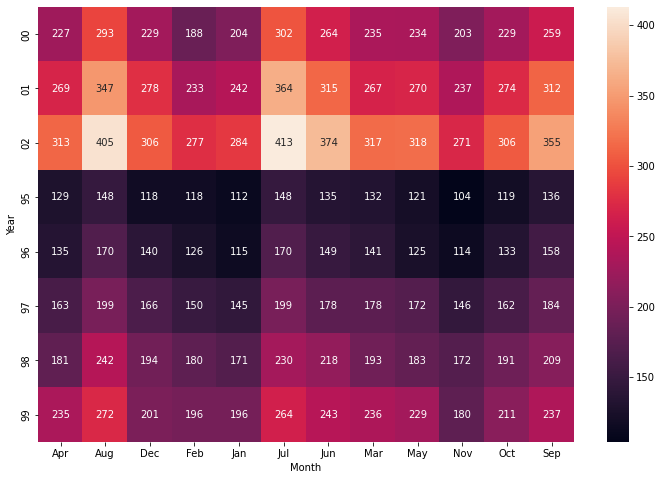

In [ ]:
# Heat Map
plt.figure(figsize=(12,8))
heatmap_y_month = pd.pivot_table(data=airlines, values='Passengers', index='Year', columns='Month',aggfunc='mean' , fill_value=0)
sns.heatmap(heatmap_y_month, annot=True, fmt='g')
plt.show();

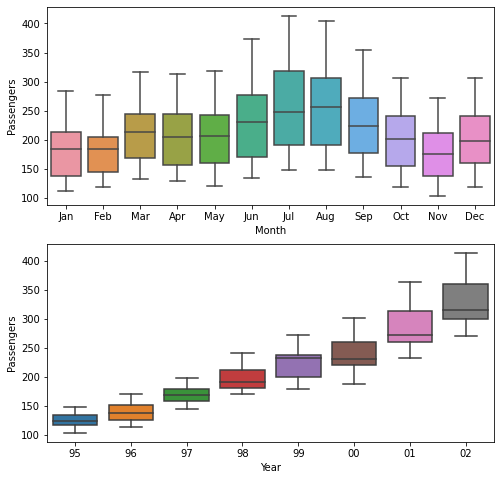

In [ ]:
# Boxplot
plt.figure(figsize=(8,8))
plt.subplot(211)
sns.boxplot(x='Month',y='Passengers',data=airlines)
plt.subplot(212)
sns.boxplot(x='Year', y='Passengers', data=airlines)
plt.show();

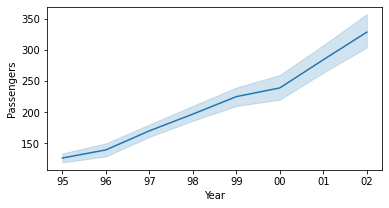

In [ ]:
# Lineplot
plt.figure(figsize=(6,3))
sns.lineplot(x='Year', y='Passengers', data=airlines)
plt.show()

In [ ]:
#calculating t, t_square & log_Passengers values
airlines['t']= np.arange(0,96)
airlines['t_square']= airlines['t']*airlines['t']
airlines['log_Passengers']= np.log(airlines['Passengers'])

In [ ]:
#Creating dummies for Month
month_dummies = pd.get_dummies(airlines['Month'])

In [ ]:
month_dummies

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
91,0,1,0,0,0,0,0,0,0,0,0,0
92,0,0,0,0,0,0,0,0,0,0,0,1
93,0,0,0,0,0,0,0,0,0,0,1,0
94,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
#merging dummies with actual dataset
airlines1= pd.concat([airlines, month_dummies], axis=1)
airlines1.head()

,Date,Passengers,Month,Year,Day,t,t_square,log_Passengers,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1995-01-01,112,Jan,95,01,0,0,4.718499,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,Feb,95,01,1,1,4.770685,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,Mar,95,01,2,4,4.882802,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,Apr,95,01,3,9,4.859812,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,May,95,01,4,16,4.795791,0,0,0,0,0,0,0,0,1,0,0,0


# **Splitting Data**

In [ ]:
Train =airlines1.head(80)
Test= airlines1.tail(16)

In [ ]:
#Linear Model
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error

linear_model=smf.ols('Passengers~t', data=Train).fit()
pred_linear =pd.Series(linear_model.predict(Test['t']))
rmse_linear= np.sqrt(mean_squared_error(Test['Passengers'],pred_linear))
rmse_linear

47.54262406772675

In [ ]:
#Exponential Model
exp_model = smf.ols('log_Passengers~t', data=Train).fit()
pred_exp = pd.Series(exp_model.predict(pd.DataFrame(Test['t'])))
rmse_exp = np.sqrt(mean_squared_error(Test['Passengers'],np.exp(pred_exp)))
rmse_exp


43.79373939334322

In [ ]:
#Quadratic
quad_model = smf.ols('Passengers~t+t_square', data=Train).fit()
pred_quad = pd.Series(quad_model.predict(Test))
rmse_quad = np.sqrt(mean_squared_error(Test['Passengers'],pred_quad))
rmse_quad

43.65440369584199

In [ ]:
#Additive seasonality
add_sea = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov', data=Train).fit()
pred_add_sea = add_sea.predict(Test)
rmse_add_sea = np.sqrt(mean_squared_error(Test['Passengers'],pred_add_sea))
rmse_add_sea

129.26647641443316

In [ ]:
#Additive seasonality Quadratic
add_sea_quad = smf.ols('Passengers~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov', data=Train).fit()
pred_add_sea_quad = add_sea_quad.predict(Test)
rmse_add_sea_quad = np.sqrt(mean_squared_error(Test['Passengers'],pred_add_sea_quad))
rmse_add_sea_quad

23.91098357009224

In [ ]:
#Multiplicative Seasonality
mult_sea = smf.ols('log_Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov', data=Train).fit()
pred_mult_sea = mult_sea.predict(Test)
rmse_mult_sea = np.sqrt(mean_squared_error(Test['Passengers'],np.exp(pred_mult_sea)))
rmse_mult_sea

135.32648414621107

In [ ]:
#Multiplicative Additive Seasonality
mult_add_sea = smf.ols('log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov', data=Train).fit()
pred_mult_add_sea = mult_add_sea.predict(Test)
rmse_mult_add_sea = np.sqrt(mean_squared_error(Test['Passengers'],np.exp(pred_mult_add_sea)))
rmse_mult_add_sea

9.469000230370991

In [ ]:
#Compare the results

data ={"Model": (["rmse_linear","rmse_exp","rmse_quad","rmse_add_sea","rmse_add_sea_quad","rmse_mult_sea","rmse_mult_add_sea"]),
       "RMSE values":([rmse_linear,rmse_exp,rmse_quad,rmse_add_sea,rmse_add_sea_quad,rmse_mult_sea,rmse_mult_add_sea])}
table_rmse = pd.DataFrame(data=data)
table_rmse.sort_values('RMSE values')


,Model,RMSE values
6,rmse_mult_add_sea,9.469000
4,rmse_add_sea_quad,23.910984
2,rmse_quad,43.654404
1,rmse_exp,43.793739
0,rmse_linear,47.542624
3,rmse_add_sea,129.266476
5,rmse_mult_sea,135.326484


# **Final Model**

In [ ]:
#Entire data for final model building
airlines_full = airlines1
airlines_full.head()

,Date,Passengers,Month,Year,Day,t,t_square,log_Passengers,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1995-01-01,112,Jan,95,01,0,0,4.718499,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,Feb,95,01,1,1,4.770685,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,Mar,95,01,2,4,4.882802,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,Apr,95,01,3,9,4.859812,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,May,95,01,4,16,4.795791,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
# Building the model on entire data set
# choosing "Multiplicative Additive seosanality" (mult_add_sea)

final_model = smf.ols('log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov', data=airlines_full).fit()

# **Data generation for prediction**

In [ ]:
t = np.arange(97,108)
t

array([ 97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107])

In [ ]:
t_square = t*t
t_square

array([ 9409,  9604,  9801, 10000, 10201, 10404, 10609, 10816, 11025,
       11236, 11449])

In [ ]:
Month=pd.date_range(start='1/1/2003', end='11/1/2003', freq='MS')
Month

DatetimeIndex(['2003-01-01', '2003-02-01', '2003-03-01', '2003-04-01',
               '2003-05-01', '2003-06-01', '2003-07-01', '2003-08-01',
               '2003-09-01', '2003-10-01', '2003-11-01'],
              dtype='datetime64[ns]', freq='MS')

In [ ]:
Month_df=pd.DataFrame(Month)
Month_df

,0
0,2003-01-01
1,2003-02-01
2,2003-03-01
3,2003-04-01
4,2003-05-01
5,2003-06-01
6,2003-07-01
7,2003-08-01
8,2003-09-01
9,2003-10-01


In [ ]:
df={'t':t, 't_square': t_square}
df= pd.DataFrame(df)
df

,t,t_square
0,97,9409
1,98,9604
2,99,9801
3,100,10000
4,101,10201
5,102,10404
6,103,10609
7,104,10816
8,105,11025
9,106,11236


In [ ]:
new_data = pd.concat([Month_df, df],axis=1)
new_data

,0,t,t_square
0,2003-01-01,97,9409
1,2003-02-01,98,9604
2,2003-03-01,99,9801
3,2003-04-01,100,10000
4,2003-05-01,101,10201
5,2003-06-01,102,10404
6,2003-07-01,103,10609
7,2003-08-01,104,10816
8,2003-09-01,105,11025
9,2003-10-01,106,11236


In [ ]:
new_data['Month']= new_data.iloc[:,0].dt.strftime('%b')
new_data['Year']= new_data.iloc[:,0].dt.strftime('%y')
new_data['Day']= new_data.iloc[:,0].dt.strftime('%d')


In [ ]:
new_data

,0,t,t_square,Month,Year,Day
0,2003-01-01,97,9409,Jan,03,01
1,2003-02-01,98,9604,Feb,03,01
2,2003-03-01,99,9801,Mar,03,01
3,2003-04-01,100,10000,Apr,03,01
4,2003-05-01,101,10201,May,03,01
5,2003-06-01,102,10404,Jun,03,01
6,2003-07-01,103,10609,Jul,03,01
7,2003-08-01,104,10816,Aug,03,01
8,2003-09-01,105,11025,Sep,03,01
9,2003-10-01,106,11236,Oct,03,01


In [ ]:
month_dummy = pd.get_dummies(new_data['Month'])
month_dummy

,Apr,Aug,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0
5,0,0,0,0,0,1,0,0,0,0,0
6,0,0,0,0,1,0,0,0,0,0,0
7,0,1,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,1
9,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
predict_data= pd.concat([new_data,month_dummy],axis=1)

In [ ]:
predict_data.rename(columns={0:'Date'}, inplace=True)
predict_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      11 non-null     datetime64[ns]
 1   t         11 non-null     int64         
 2   t_square  11 non-null     int64         
 3   Month     11 non-null     object        
 4   Year      11 non-null     object        
 5   Day       11 non-null     object        
 6   Apr       11 non-null     uint8         
 7   Aug       11 non-null     uint8         
 8   Feb       11 non-null     uint8         
 9   Jan       11 non-null     uint8         
 10  Jul       11 non-null     uint8         
 11  Jun       11 non-null     uint8         
 12  Mar       11 non-null     uint8         
 13  May       11 non-null     uint8         
 14  Nov       11 non-null     uint8         
 15  Oct       11 non-null     uint8         
 16  Sep       11 non-null     uint8         
dtypes: datetime64[ns](

In [ ]:
# Data for which forecasting is to be done
predict_data

,Date,t,t_square,Month,Year,Day,Apr,Aug,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,2003-01-01,97,9409,Jan,03,01,0,0,0,1,0,0,0,0,0,0,0
1,2003-02-01,98,9604,Feb,03,01,0,0,1,0,0,0,0,0,0,0,0
2,2003-03-01,99,9801,Mar,03,01,0,0,0,0,0,0,1,0,0,0,0
3,2003-04-01,100,10000,Apr,03,01,1,0,0,0,0,0,0,0,0,0,0
4,2003-05-01,101,10201,May,03,01,0,0,0,0,0,0,0,1,0,0,0
5,2003-06-01,102,10404,Jun,03,01,0,0,0,0,0,1,0,0,0,0,0
6,2003-07-01,103,10609,Jul,03,01,0,0,0,0,1,0,0,0,0,0,0
7,2003-08-01,104,10816,Aug,03,01,0,1,0,0,0,0,0,0,0,0,0
8,2003-09-01,105,11025,Sep,03,01,0,0,0,0,0,0,0,0,0,0,1
9,2003-10-01,106,11236,Oct,03,01,0,0,0,0,0,0,0,0,0,1,0


# **Forecasting**

In [ ]:
#Forecasting on new data (predict_data)
pred_final= final_model.predict(predict_data)

In [ ]:
forecasted_passengers= np.exp(pred_final)
forecasted_passengers

0     324.401579
1     327.833787
2     378.299321
3     366.073228
4     363.693142
5     411.641432
6     457.788313
7     456.820392
8     409.137573
9     359.221716
10    315.288898
dtype: float64

In [ ]:
predict_data['forecasted_passengers'] = pd.Series(forecasted_passengers)

In [ ]:
predict_data

,Date,t,t_square,Month,Year,Day,Apr,Aug,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,forecasted_passengers
0,2003-01-01,97,9409,Jan,03,01,0,0,0,1,0,0,0,0,0,0,0,324.401579
1,2003-02-01,98,9604,Feb,03,01,0,0,1,0,0,0,0,0,0,0,0,327.833787
2,2003-03-01,99,9801,Mar,03,01,0,0,0,0,0,0,1,0,0,0,0,378.299321
3,2003-04-01,100,10000,Apr,03,01,1,0,0,0,0,0,0,0,0,0,0,366.073228
4,2003-05-01,101,10201,May,03,01,0,0,0,0,0,0,0,1,0,0,0,363.693142
5,2003-06-01,102,10404,Jun,03,01,0,0,0,0,0,1,0,0,0,0,0,411.641432
6,2003-07-01,103,10609,Jul,03,01,0,0,0,0,1,0,0,0,0,0,0,457.788313
7,2003-08-01,104,10816,Aug,03,01,0,1,0,0,0,0,0,0,0,0,0,456.820392
8,2003-09-01,105,11025,Sep,03,01,0,0,0,0,0,0,0,0,0,0,1,409.137573
9,2003-10-01,106,11236,Oct,03,01,0,0,0,0,0,0,0,0,0,1,0,359.221716
